# Epidemiology

Kermack-McKendrick (KM) model of infectious disease

In [ ]:
# download modsim.py if necessary

from os.path import exists

filename = 'modsim.py'
if not exists(filename):
    from urllib.request import urlretrieve
    url = 'https://raw.githubusercontent.com/AllenDowney/ModSim/main/'
    local, _ = urlretrieve(url+filename, filename)
    print('Downloaded ' + local)

In [2]:
from matplotlib import pyplot
%matplotlib inline
%config InlineBackend.figure_format = "retina"

import modsim

### Implementing the KM model

In [3]:
init = modsim.State(s=89, i=1, r=0)
init

,values
s,89
i,1
r,0


In [4]:
init /= init.sum()
init

,values
s,0.988889
i,0.011111
r,0.000000


In [5]:
tc = 3             # time between contacts in days 
tr = 4             # recovery time in days

In [6]:
beta = 1 / tc      # contact rate in per day
gamma = 1 / tr     # recovery rate in per day

In [7]:
def make_system(beta, gamma):
    init = modsim.State(s=89, i=1, r=0)
    init /= init.sum()

    return modsim.System(
        init=init, t_end=7*14,
        beta=beta, gamma=gamma,
    )

In [8]:
system = make_system(beta, gamma)
system

,values
init,s 0.988889 i 0.011111 r 0.000000 dtyp...
t_end,98
beta,0.333333
gamma,0.25


In [11]:
def update_func(t, state, system):
    s, i, r = state.s, state.i, state.r

    infected = system.beta * i * s    
    recovered = system.gamma * i
    
    s -= infected
    i += infected - recovered
    r += recovered
    
    return modsim.State(s=s, i=i, r=r)

In [12]:
state = update_func(0, init, system)
state

,values
s,0.985226
i,0.011996
r,0.002778


In [14]:
def run_simulation1(system, update_func):
    state = system.init

    for t in range(0, system.t_end):
        state = update_func(t, state, system)

    return state

In [17]:
final_state = run_simulation1(system, update_func)
final_state

,values
s,0.520568
i,0.000666
r,0.478766


In [18]:
def run_simulation2(system, update_func):
    S = modsim.TimeSeries()
    I = modsim.TimeSeries()
    R = modsim.TimeSeries()

    state = system.init
    S[0], I[0], R[0] = state
    
    for t in range(0, system.t_end):
        state = update_func(t, state, system)
        S[t+1], I[t+1], R[t+1] = state.s, state.i, state.r
    
    return S, I, R

In [19]:
S, I, R = run_simulation2(system, update_func)

In [22]:
def plot_results(S, I, R):
    S.plot(linestyle='--', label='Susceptible')
    I.plot(linestyle='-', label='Infected')
    R.plot(linestyle=':', label='Resistant')
    modsim.decorate(xlabel='Time (days)',
             ylabel='Fraction of population')

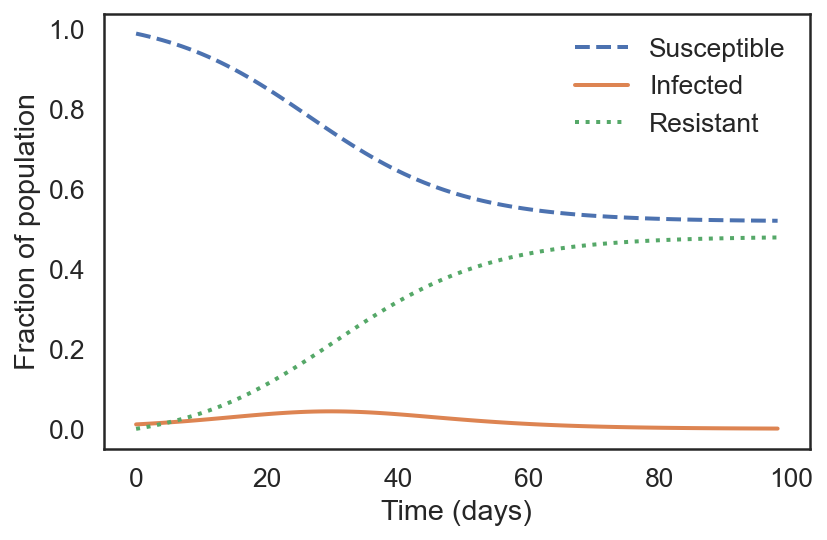

In [23]:
plot_results(S, I, R)

In [24]:
def run_simulation(system, update_func):
    frame = modsim.TimeFrame(columns=system.init.index)
    frame.loc[0] = system.init
    
    for t in range(0, system.t_end):
        frame.loc[t+1] = update_func(t, frame.loc[t], system)
    
    return frame

In [27]:
results = run_simulation(system, update_func)

In [28]:
results.head()

,s,i,r
0,0.988889,0.011111,0.000000
1,0.985226,0.011996,0.002778
2,0.981287,0.012936,0.005777
3,0.977055,0.013934,0.009011
4,0.972517,0.014988,0.012494


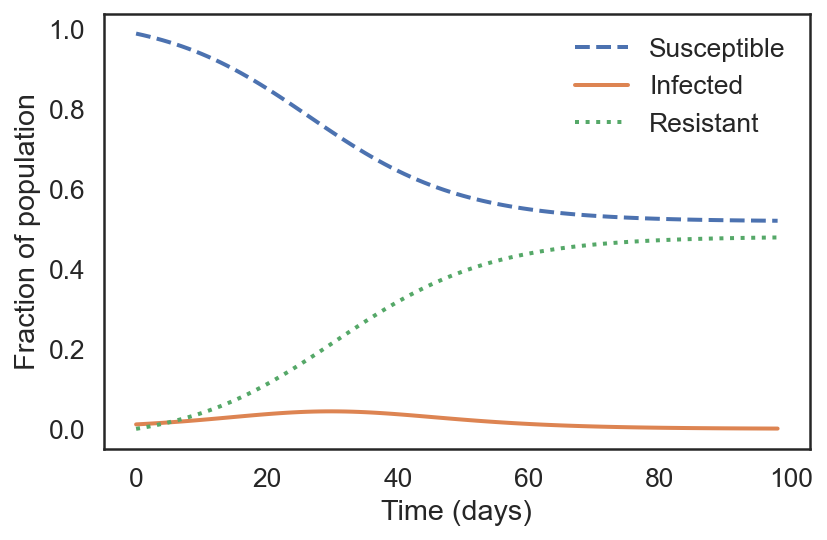

In [29]:
plot_results(results.s, results.i, results.r)

### Exercise 1
Suppose the time between contacts is 4 days and the recovery time is 5 days. After 14 weeks, how many students, total, have been infected?

Hint: what is the change in `S` between the beginning and the end of the simulation?

In [81]:
tc = 4             # time between contacts in days 
tr = 5             # recovery time in days
beta, gamma = 1/tc, 1/tr
system_1 = make_system(beta, gamma)
system_1

,values
init,s 0.988889 i 0.011111 r 0.000000 dtyp...
t_end,98
beta,0.25
gamma,0.2


In [82]:
init = modsim.State(s=89, i=1, r=0)
init /= init.sum()
init

,values
s,0.988889
i,0.011111
r,0.000000


In [83]:
results_1 = run_simulation(system_1, update_func)

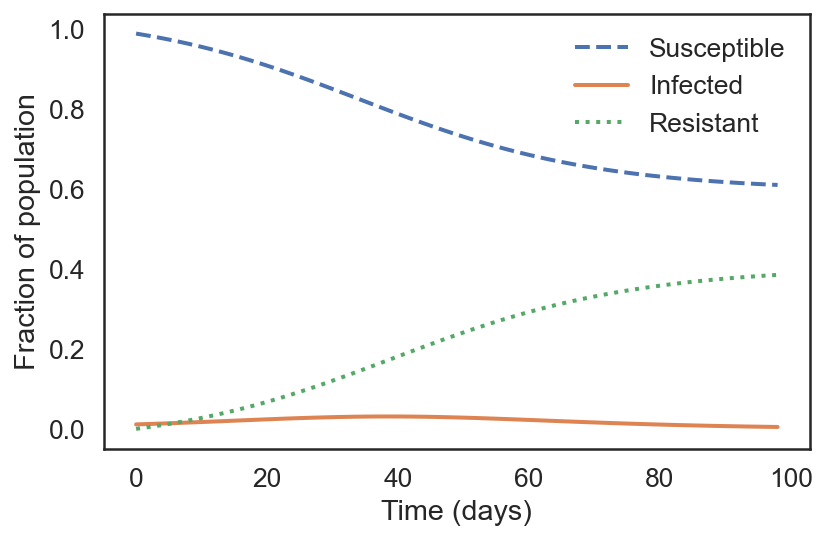

In [84]:
plot_results(results_1.s, results_1.i, results_1.r)

In [86]:
print("Fraction of students infected: ", (results_1["s"].iloc[0] - results_1["s"].iloc[-1]))

Fraction of students infected:  0.3787177442414792
